<a href="https://colab.research.google.com/github/ALTHD12/PROJECT_1_A/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print("Downloading and extracting dataset...")
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
print("Dataset downloaded and extracted successfully.")

def load_data(path):
    features = pd.read_csv('UCI HAR Dataset/features.txt', header=None, delim_whitespace=True)[1].values
    X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
    X_train.columns = features
    y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, names=['activity_id'])

    activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delim_whitespace=True, names=['activity_id', 'activity_name'])
    y_train = y_train.merge(activity_labels, on='activity_id')['activity_name']

    return X_train, y_train

X, y_true = load_data('UCI HAR Dataset/')

print("\nData loaded. Here's a preview:")
print(X.head())
print("\nActivity labels:")
print(y_true.value_counts())

Dataset downloaded and extracted successfully.


/tmp/ipython-input-2-1602016898.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('UCI HAR Dataset/features.txt', header=None, delim_whitespace=True)[1].values
/tmp/ipython-input-2-1602016898.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)



Data loaded. Here's a preview:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBo

/tmp/ipython-input-2-1602016898.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activity_labels = pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delim_whitespace=True, names=['activity_id', 'activity_name'])


In [4]:
# --- Preprocess the Data ---
print(f"\nMissing values: {X.isnull().sum().sum()}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

print("\nK-Means clustering complete.")


Missing values: 0

K-Means clustering complete.


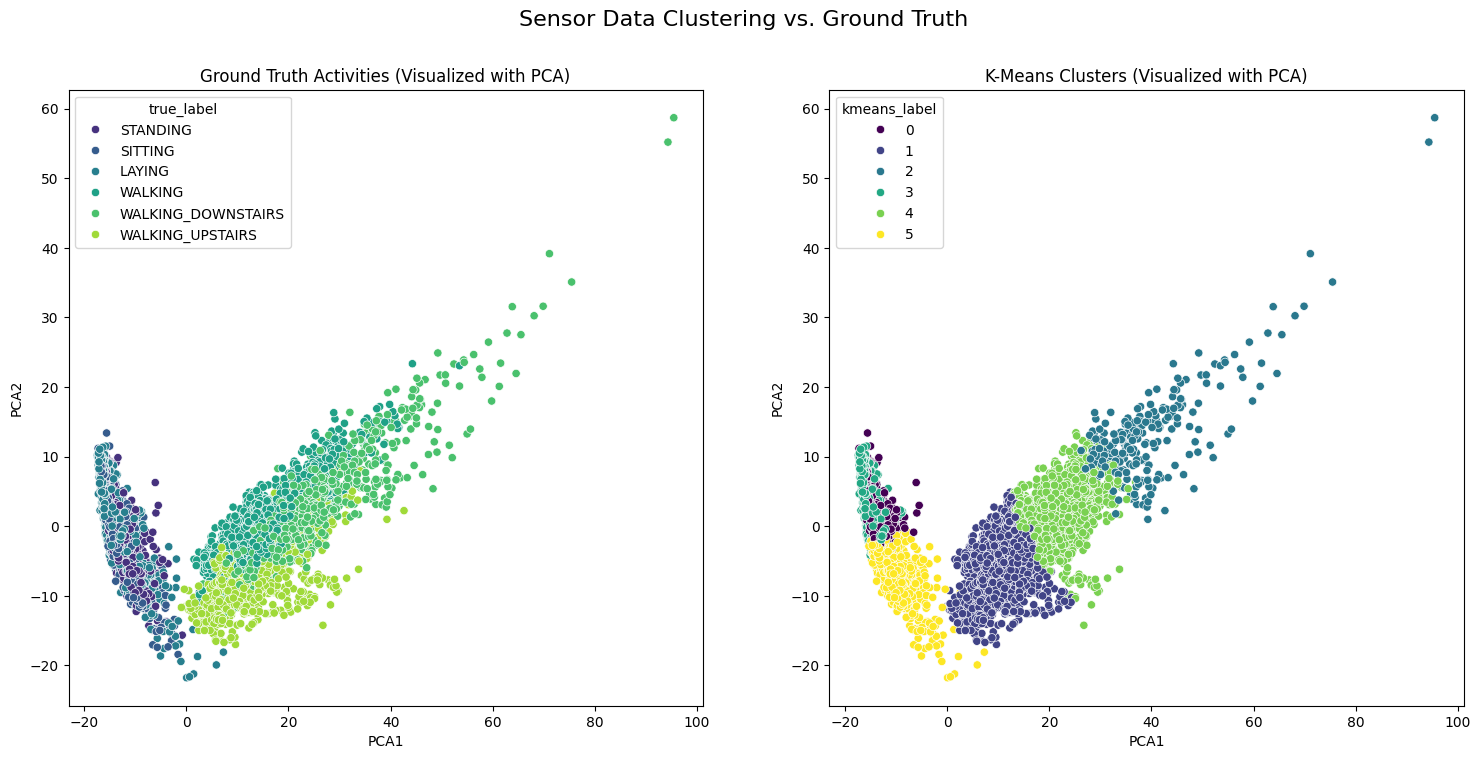

In [5]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_plot['true_label'] = y_true
df_plot['kmeans_label'] = y_kmeans

# Visualizing the Results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Sensor Data Clustering vs. Ground Truth', fontsize=16)

sns.scatterplot(
    data=df_plot,
    x='PCA1',
    y='PCA2',
    hue='true_label',
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Ground Truth Activities (Visualized with PCA)')

sns.scatterplot(
    data=df_plot,
    x='PCA1',
    y='PCA2',
    hue='kmeans_label',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('K-Means Clusters (Visualized with PCA)')

plt.show()